In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader2

import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import transforms


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import classification_report , confusion_matrix


In [2]:
batch_size = 64

In [3]:
train_dataset = MNIST(root='Datasets/',download=True,transform=transforms.ToTensor())
test_dataset = MNIST(root='Datasets/',train=False,transform=transforms.ToTensor())

In [4]:
train_loader = DataLoader2(train_dataset,batch_size=batch_size,shuffle=True) 
test_loader = DataLoader2(test_dataset,batch_size=batch_size,shuffle=True) 


In [5]:
def accuracy(train_loader,test_loader,model,reshape=True):
    model.eval()
    r_pred=[]
    r=[]
    for _,(x,y) in enumerate(train_loader):
        if reshape==True:
            x = x.reshape(x.shape[0],-1)
        scores = model(x)
        _, y_pred = scores.max(1)
        r = r + list(y.numpy())
        r_pred = r_pred + list(y_pred.numpy())
    
    print("\n\n########## Train Data Accuracy ######### \n\n")
    print(classification_report(r,r_pred))
    sns.heatmap(confusion_matrix(r,r_pred))
    plt.show()
    
    
    
    r_pred=[]
    r=[]
    for _,(x,y) in enumerate(test_loader):
        if reshape==True:
            x = x.reshape(x.shape[0],-1)
        scores = model(x)
        _, y_pred = scores.max(1)
        r = r + list(y.numpy())
        r_pred = r_pred + list(y_pred.numpy())
    
    print("\n\n########## Test Data Accuracy ######### \n\n") 
    print(classification_report(r,r_pred))
    sns.heatmap(confusion_matrix(r,r_pred))


In [6]:
class Network(nn.Module):
    def __init__(self,input_size,num_classes):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(input_size,30)        
        self.fc2 = nn.Linear(30,num_classes)
    def forward(self,x):
        x = F.relu(self.fc1(x))        
        x = self.fc2(x)       
#         x = self.fc2(x)
        return x


    

In [7]:
### parameter Initialization

input_size= 784
num_classes= 10
lr = 0.001

epochs = 3


## Model Initialization
model = Network(input_size,num_classes)


## Loss Function and Optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001,)


##### Train The network ##########

for epoch in range(epochs):
    for batch_id,(x,y) in  enumerate(train_loader):
        
        x = x.reshape(x.shape[0],-1)
        scores = model(x)
        loss = loss_func(scores,y)
        
        # backward prop
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()





########## Train Data Accuracy ######### 


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5923
           1       0.97      0.97      0.97      6742
           2       0.94      0.96      0.95      5958
           3       0.93      0.94      0.93      6131
           4       0.96      0.94      0.95      5842
           5       0.95      0.92      0.93      5421
           6       0.98      0.96      0.97      5918
           7       0.97      0.96      0.96      6265
           8       0.93      0.94      0.94      5851
           9       0.93      0.95      0.94      5949

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000



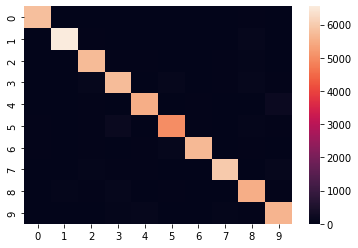



########## Test Data Accuracy ######### 


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.92      0.95      0.93      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.90      0.92       892
           6       0.97      0.95      0.96       958
           7       0.97      0.94      0.95      1028
           8       0.93      0.94      0.93       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



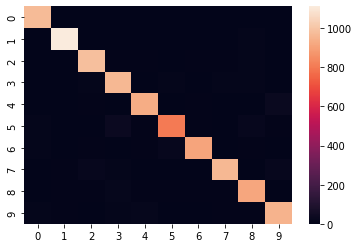

In [8]:
accuracy(train_loader,test_loader,model)

In [9]:
######### CNN Example
class CNN(nn.Module):
    def __init__(self,in_channels=1,num_classes=10):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels,8,kernel_size=(2,2),stride=(1,1),padding=(1,1))
        self.conv2 = nn.Conv2d(8,16,kernel_size=(2,2),stride=(1,1),padding=(1,1))
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.fc1 = nn.Linear(16*7*7,10)        
#         self.fc2 = nn.Linear(20,num_classes)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0],-1)
#         print(x.shape)
        x = self.fc1(x)     
#         x = self.fc2(x)       
#         x = self.fc2(x)
        return x

In [10]:
in_channels= 1
num_classes= 10
lr = 0.001
epochs = 3

## Model Initialization
model_cnn = CNN(in_channels,num_classes)


## Loss Function and Optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(),lr=0.001,)


##### Train The network ##########

for epoch in range(epochs):
    for batch_id,(x,y) in  enumerate(train_loader):
        
#         x = x.reshape(x.shape[0],-1)
        scores = model_cnn(x)
        loss = loss_func(scores,y)
        
        # backward prop
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()



        




########## Train Data Accuracy ######### 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.98      0.99      0.98      6742
           2       0.98      0.96      0.97      5958
           3       0.99      0.94      0.97      6131
           4       0.98      0.97      0.98      5842
           5       0.96      0.98      0.97      5421
           6       0.98      0.99      0.99      5918
           7       0.96      0.98      0.97      6265
           8       0.97      0.96      0.96      5851
           9       0.96      0.96      0.96      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



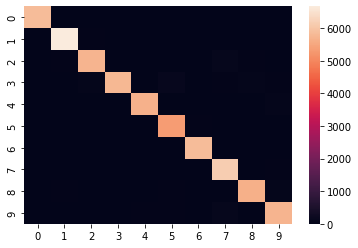



########## Test Data Accuracy ######### 


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.99      0.95      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.99      0.98      0.99       958
           7       0.95      0.98      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



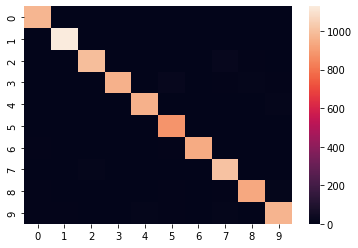

In [11]:
accuracy(train_loader,test_loader,model_cnn,reshape=False)

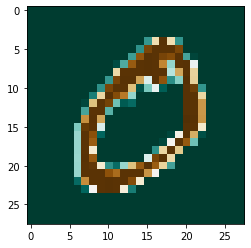

In [12]:
plt.imshow(train_dataset[1][0][0,:,:],cmap='BrBG_r')
